In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
plt.style.use("ggplot")

def phi(x, y):
    return np.array([x, y, 1])
 
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

def one_hot_encode(arr, num_classes):
    return np.eye(num_classes)[arr]

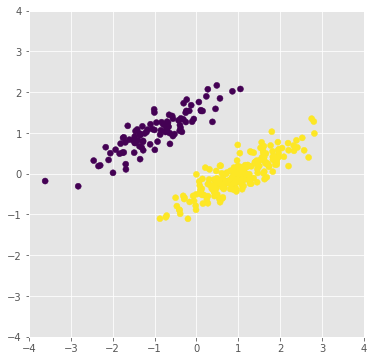

In [6]:
N = 100
N2 = 200
alpha = 1
 
np.random.seed(2)
mu1 = [-1, 1]
mu2 = [1, 0]
sigma1 = sigma2 = sigma3 = np.array([[0.6, 0.3],[0.3, 0.2]])
 
data1 = np.random.multivariate_normal(mu1, sigma1, N)
data2 = np.random.multivariate_normal(mu2, sigma2, N2)

m1 = np.average(data1, axis=0)
m2 = np.average(data2, axis=0)

train_X = np.concatenate((data1, data2))
train_t = np.concatenate((np.repeat(0, N), np.repeat(1,N2)))
train_X, train_t = shuffle(train_X, train_t)

plt.figure(figsize=(6, 6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_t)
plt.show()

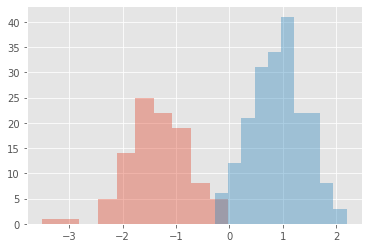

In [7]:
# クラス間平均値のみに注目すると…
w = m2 - m1
w = w / np.linalg.norm(w)

plt.hist(w.dot(data1.T), alpha=0.4)
plt.hist(w.dot(data2.T), alpha=0.4)
plt.show()

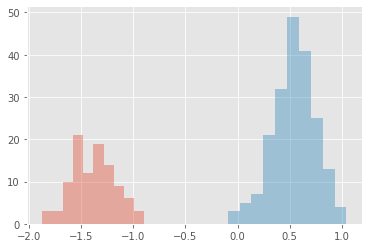

In [9]:
# フィッシャーの判別式を導入する
S_w = np.zeros((2,2))
for i in range(N):
  S_w += np.outer(data1[i]-m1,data1[i]-m1)
for i in range(N2):
  S_w += np.outer(data2[i]-m2, data2[i]-m2)
 
w = np.linalg.inv(S_w)@(m2-m1)
w = w / np.linalg.norm(w)

plt.hist(w.dot(data1.T), alpha=0.4)
plt.hist(w.dot(data2.T), alpha=0.4)
plt.show()

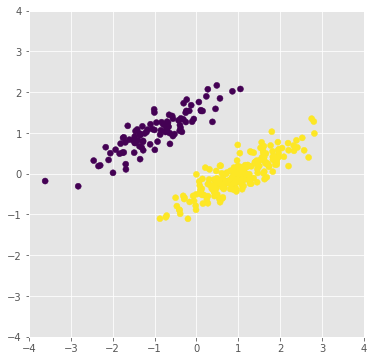

In [10]:
N = 100
N2 = 200
 
np.random.seed(2)
mu1 = [-1, 1]
mu2 = [1, 0]
sigma1 = sigma2 = sigma3 = np.array([[0.6, 0.3],[0.3, 0.2]])
 
data1 = np.random.multivariate_normal(mu1, sigma1, N)
data2 = np.random.multivariate_normal(mu2, sigma2, N2)
 
m1= np.average(data1, axis=0)
m2= np.average(data2, axis=0)
 
train_X = np.concatenate((data1, data2))
train_t = np.concatenate((np.repeat(0, N), np.repeat(1, N2)))
train_X,  train_t = shuffle(train_X,  train_t)
 
m = np.average(train_X, axis=0)
 
plt.figure(figsize=(6, 6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_t)
plt.show()

[-0.51706894 -0.05374933 -0.58461689]


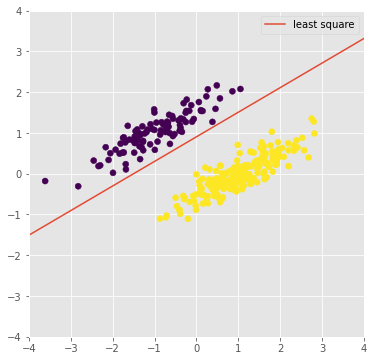

In [15]:
# 目的変数をいじると二乗誤差と同じになる
#wの初期値
w = np.random.randn(3)
print(w)
e = 0.1
Phi = np.array([phi(x,y) for x,y in train_X])
y = sigmoid(w.dot(Phi.T))
 
train_t = train_t.astype("float32")
train_t[train_t == 1] = (N + N2) / float(N)
train_t[train_t == 0] = - (N + N2) / float(N2)
 
#最小二乗分類
w_ls = LA.inv(Phi.T.dot(Phi)).dot(Phi.T).dot(train_t)
 
plt.figure(figsize=(6, 6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
 
x_ = np.linspace(-4, 4)
y_ = - w[0] / w[1] * x_ - w[2] / w[1]  #境界線 w0 * x + w1 * y + w2 = 0
y_ls = - w_ls[0] / w_ls[1] * x_ - w_ls[2] / w_ls[1]
plt.plot(x_, y_ls, label="least square")
plt.scatter(train_X[:, 0], train_X[:, 1], c=train_t)
plt.legend()
plt.show()